## Pr_3

In [161]:
# data processing libs
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [162]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [163]:
# load data from drive
df = pd.read_csv("mines/Mine Dataset/Mine_Dataset.csv")

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [165]:
df.describe()

,V,H,S,M
count,338.000,338.000,338.000,338.000
mean,0.431,0.509,0.504,2.953
std,0.196,0.306,0.344,1.420
min,0.198,0.000,0.000,1.000
25%,0.310,0.273,0.200,2.000
50%,0.360,0.545,0.600,3.000
75%,0.483,0.727,0.800,4.000
max,1.000,1.000,1.000,5.000


### PCA

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

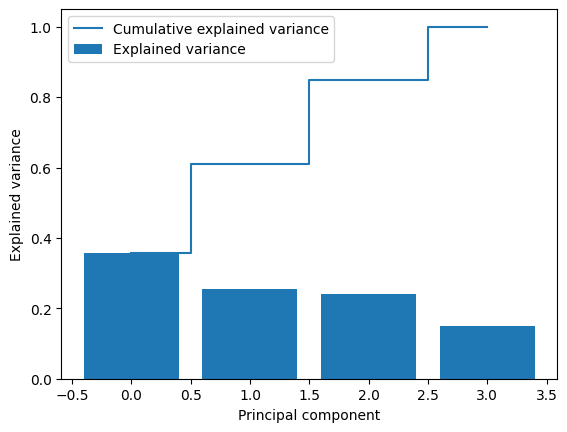

In [167]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df)
pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
#plt.tight_layout()
plt.show()

In [168]:
param = 'S'

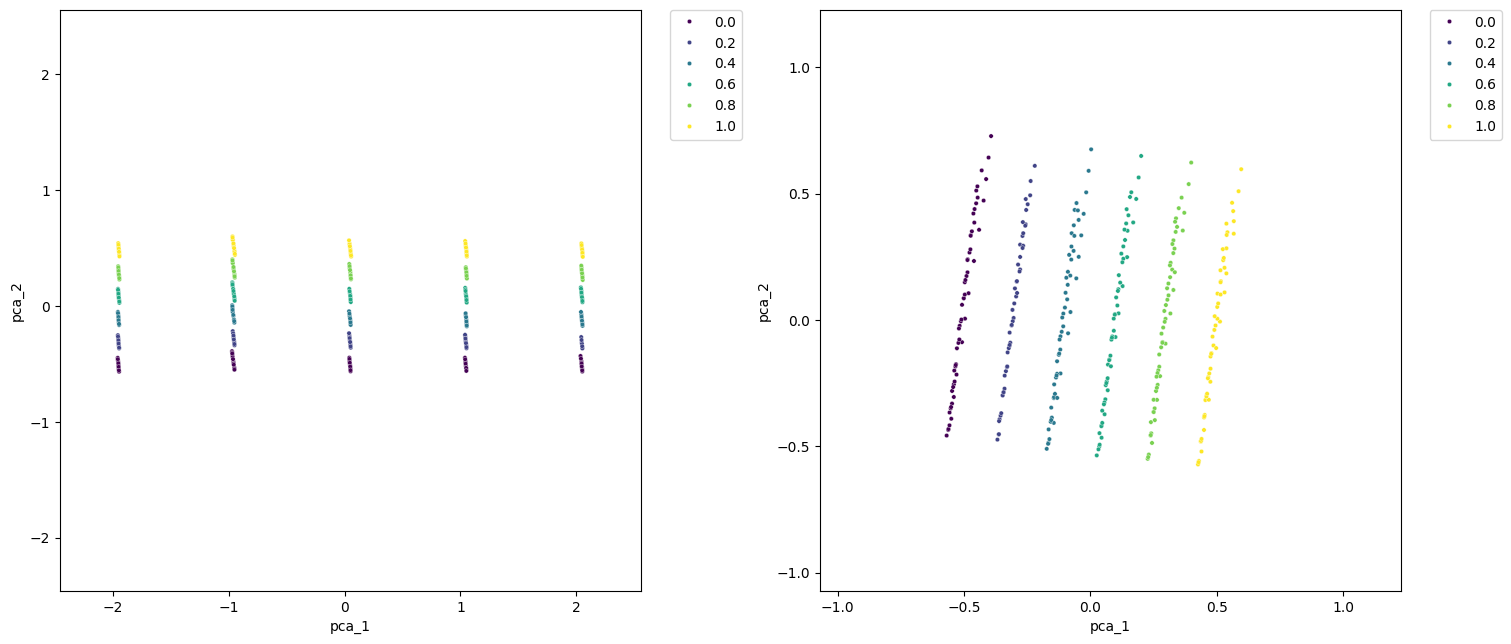

In [169]:
X_1 = df#.drop(['M'], axis = 1)
y_1 = df[param] # m h v s

pca = PCA(n_components=2)
pca_result_1 = pca.fit_transform(X_1)
pca_result_df_1 = pd.DataFrame({'pca_1': pca_result_1[:,0], 'pca_2': pca_result_1[:,1], 'label': y_1})

X_2 = df.drop(['M'], axis = 1)
y_2 = df[param] # m h v s

pca = PCA(n_components=2)
pca_result_2 = pca.fit_transform(X_2)
pca_result_df_2 = pd.DataFrame({'pca_1': pca_result_2[:,0], 'pca_2': pca_result_2[:,1], 'label': y_2})

### ###

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout = True, figsize=(15, 15))

# using padding

sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df_1, ax=ax[0],s=10, palette='viridis')
lim = (pca_result_1.min()-0.5, pca_result_1.max()+0.5)
ax[0].set_xlim(lim)
ax[0].set_ylim(lim)
ax[0].set_aspect('equal')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df_2, ax=ax[1],s=10, palette='viridis')
lim = (pca_result_2.min()-0.5, pca_result_2.max()+0.5)
ax[1].set_xlim(lim)
ax[1].set_ylim(lim)
ax[1].set_aspect('equal')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)